# 환경설정

In [1]:
# colab 드라이브 연결하기 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터프레임 다루기 
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore')

# 카드 데이터 전처리

In [ ]:
# 데이터 불러오기 
df_nt = pd.read_csv('/content/drive/MyDrive/프로젝트/문화관광빅데이터/NATIVE_RE.txt', sep = '|')
df_nt.head()

In [4]:
# 데이터 컬럼 확인 
df_nt.columns

Index(['v1', 'v2', 'v3', 'gb3', 'gb2', 'sex_ccd', 'cln_age_r', 'ta_ym',
       'daw_ccd_r', 'apv_ts_dl_tm_r', 'vlm', 'usec'],
      dtype='object')

In [5]:
# 데이터 컬럼 명 변경 
df_nt.rename(columns={'v1':'거주지', 'v2':'이용_시도', 'v3':'이용_시군구', 'gb3':'업종대','gb2':'업종소','sex_ccd':'성별','cln_age_r':'연령대', 'ta_ym':'이용년월',
       'daw_ccd_r' :'요일', 'apv_ts_dl_tm_r':'이용시간대', 'vlm':"취급액(원)", 'usec':'이용건수(건)'},inplace = True)

# 데이터 타입 확인 
df_nt.dtypes

거주지        object
이용_시도      object
이용_시군구     object
업종대        object
업종소        object
성별         object
연령대        object
이용년월        int64
요일         object
이용시간대      object
취급액(원)      int64
이용건수(건)     int64
dtype: object

In [ ]:
# 행 선택 
df_nt = df_nt[df_nt['업종대'] == '여행']
df_nt = df_nt[df_nt['이용년월']>=201901]

df_nt.head()

In [ ]:
# 연월별 지출 데이터 추출 
df_cs = df_nt[['이용년월','취급액(원)','이용건수(건)']]
df_cs.reset_index(inplace = True, drop = True)
df_cs.head(5)

In [ ]:
 df_cs = df_cs.groupby('이용년월').sum()
 df_cs.reset_index(inplace = True)
 df_cs.head()

In [ ]:
df_cs['년'] = df_cs['이용년월'] // 100 # 몫 계산 
df_cs['월'] = df_cs['이용년월'] % 100 # 나머지 
df_cs.head(5)

# 연도별 여행 소비금액 변화 시각화

In [10]:
# 모듈 불러오기 
import plotly.graph_objs as go 
import plotly.express as px  

In [11]:
years = [2019, 2020, 2021] 
colors = ['#FF8364','#5F6CAF', '#FFB677' ]

fig = go.Figure() # 그래프 그릴 fig 생성 

for i in range(len(years)) : 
  fig.add_trace(go.Scatter(x = df_cs[df_cs['년']== years[i]]['월'], 
                           y = df_cs[df_cs['년']== years[i]]['취급액(원)'],
                           name = f'{years[i]}년 소비금액',
                           hovertemplate = '<i>월 : </i> : %{x}월' + 
                           '<br><br>소비금액(원)</b> : %{y} <br>',
                           line = dict(color = colors[i],
                                       width = 3)))

fig.update_layout(title = '연도별 여행 소비금액 변화 시각화',
                  xaxis_title = '월',
                  yaxis_title = '소비금액(원)',
                  plot_bgcolor = "#f4f4f4")

fig.show()

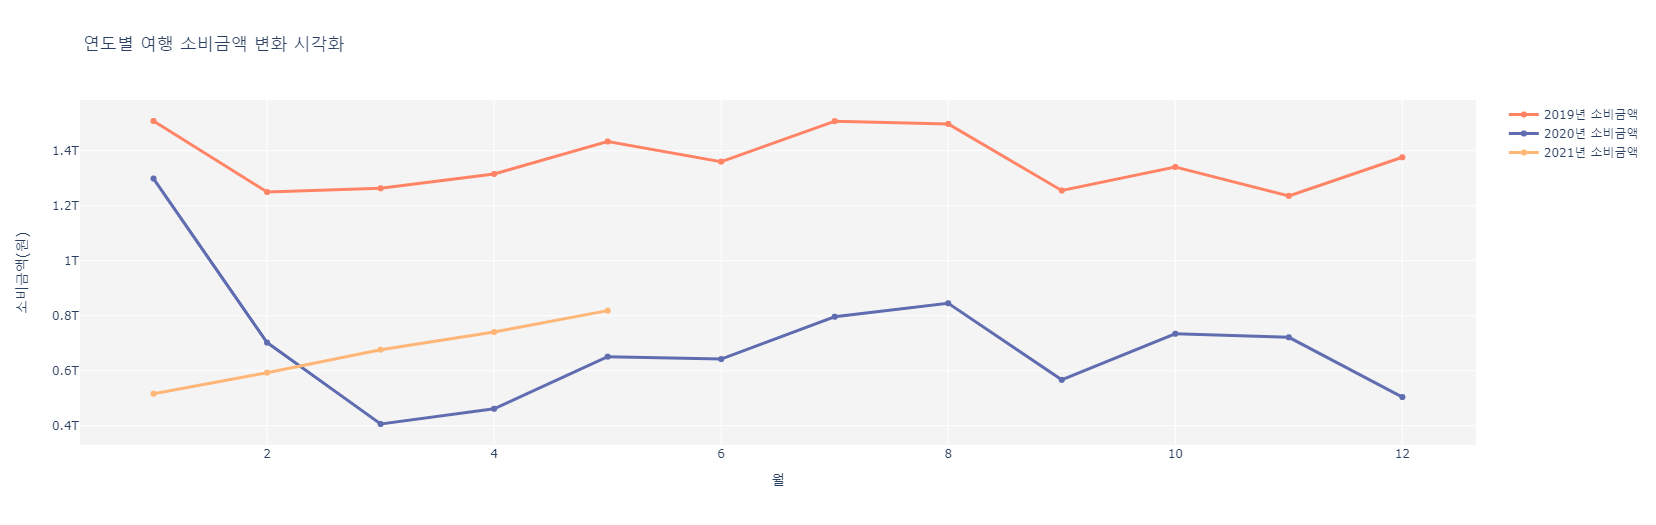

# 연도 별 여행 이용건수 변화 시각화 

In [12]:
df_cs.columns

Index(['이용년월', '취급액(원)', '이용건수(건)', '년', '월'], dtype='object')

In [17]:
colors = ['#EA2C62','#8ac4d0', '#f4d160']

fig = go.Figure() # 그래프 그릴 fig 생성 

for i in range(len(years)) : 
  fig.add_trace(go.Scatter(x = df_cs[df_cs['년']== years[i]]['월'], 
                           y = df_cs[df_cs['년']== years[i]]['이용건수(건)'],
                           name = f'{years[i]}년 여행 이용건수(건)',
                           hovertemplate = '<i>월 : </i> : %{x}월' + 
                           '<br><br>여행 이용건수(건)</b> : %{y} <br>',
                           line = dict(color = colors[i],
                                       width = 3)))

fig.update_layout(title = '연도별 여행 이용건수 변화 시각화',
                  xaxis_title = '월',
                  yaxis_title = '이용건수(건)',
                  plot_bgcolor = "#f4f4f4")

fig.show()

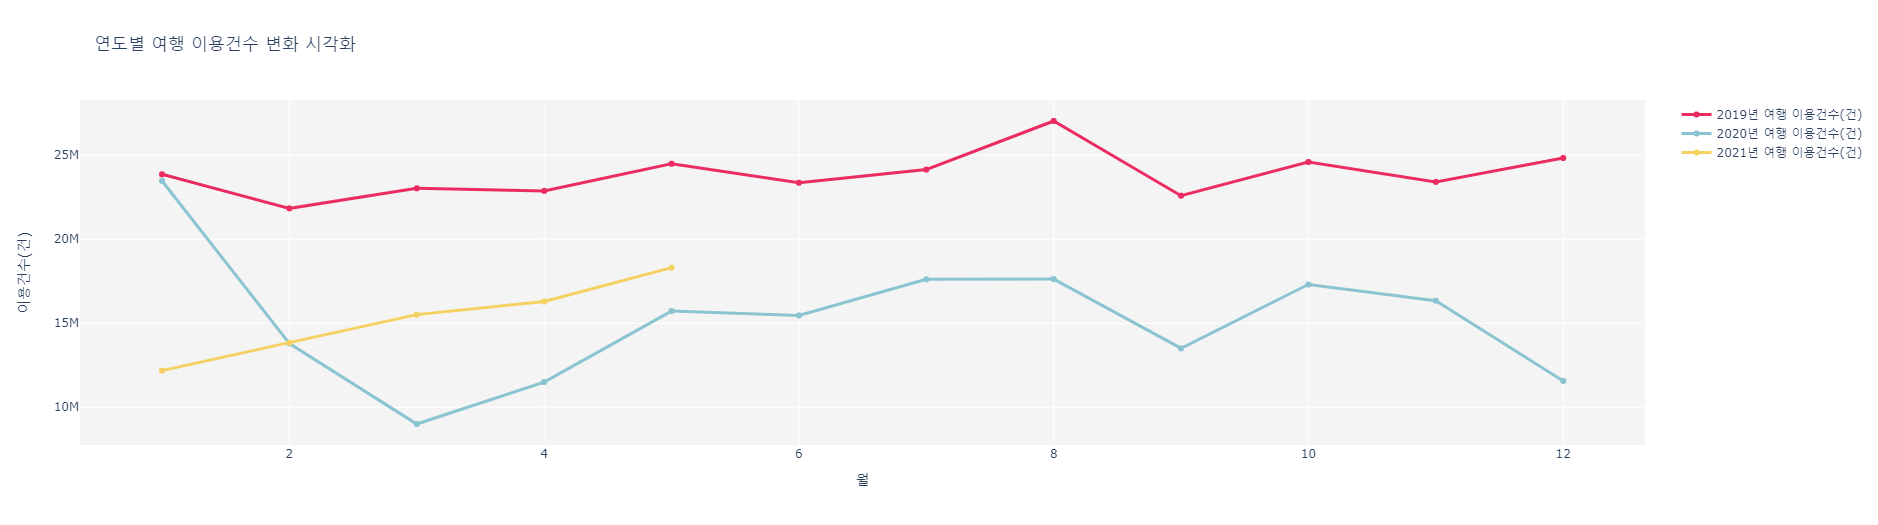

# 코로나 데이터 전처리

In [18]:
# 모듈 불러오기 

import requests 
from bs4 import BeautifulSoup as bs 
from urllib import parse 


In [19]:
# api 요청 
serviceKey = '<발급받은 api_key>'

params = {'ServiceKey' : parse.unquote(serviceKey),
          'startCreateDt':20200130, # 데이터 생성일 시작범위(선택)
          'endCreateDt':20210531} # 데이터 생성일 종료범위(선택)

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?' # 서비스 url 

res = requests.get(url,params= params)
soup = bs(res.text, 'lxml')

print(soup)


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><html><body><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><items><item><accdefrate>1.4568155576</accdefrate><accexamcnt>9761156</accexamcnt><accexamcompcnt>9633203</accexamcompcnt><carecnt>7555</carecnt><clearcnt>130824</clearcnt><createdt>2021-05-31 09:34:29.254</createdt><deathcnt>1959</deathcnt><decidecnt>140338</decidecnt><examcnt>127953</examcnt><resutlnegcnt>9492865</resutlnegcnt><seq>528</seq><statedt>20210531</statedt><statetime>00:00</statetime><updatedt>2021-08-13 18:07:07.589</updatedt></item><item><accdefrate>1.4541759643</accdefrate><accexamcnt>9747612</accexamcnt><accexamcompcnt>9621119</accexamcompcnt><carecnt>7569</carecnt><clearcnt>130382</clearcnt><createdt>2021-05-30 09:24:39.384</createdt><deathcnt>1957</deathcnt><decidecnt>139908</decidecnt><examcnt>126493</examcnt><resutlnegcnt>9481211</resutlnegcnt><seq>527</seq><statedt>20210530</statedt><statetime>00:00</stateti

In [25]:
# 태그로 원하는 데이터 찾기 
statedt = soup.find_all('statedt')
decidecnt = soup.find_all('decidecnt')

In [26]:
# 데이터 프레임 생성 
date_list, decidecnt_list = [], []

for i in range(len(statedt)) : 
  date_list.append(statedt[i].get_text())
  decidecnt_list.append(decidecnt[i].get_text())

df_covid = pd.DataFrame({
    '년월일' : date_list,
    '확진자수' : decidecnt_list
})

df_covid.head()

,년월일,확진자수
0,20210531,140338
1,20210530,139908
2,20210529,139428
3,20210528,22895
4,20210527,138308


In [28]:
df_covid.to_csv('/content/drive/MyDrive/프로젝트/문화관광빅데이터/df_covid2.csv', index = False )

In [30]:
df_covid.dtypes

년월일     object
확진자수    object
dtype: object

In [33]:
# 데이터 전처리 

df_covid['년'] = df_covid['년월일'].str[:4]
df_covid['월'] = df_covid['년월일'].str[4:6]

df_covid.head()

,년월일,확진자수,년,월
0,20210531,140338,2021,05
1,20210530,139908,2021,05
2,20210529,139428,2021,05
3,20210528,22895,2021,05
4,20210527,138308,2021,05


In [41]:
df_covid.drop('년월일', axis = 1, inplace= True)
df_covid['확진자수'] = df_covid['확진자수'].astype(int)
df_covid2 = df_covid.groupby(['년','월']).sum()
df_covid2.reset_index(inplace = True)
df_covid2.head()

,년,월,확진자수
0,2020,01,0
1,2020,02,12109
2,2020,03,242883
3,2020,04,315359
4,2020,05,342230


In [42]:
df_covid2['년'] = df_covid2['년'].astype(int)
df_covid2['월'] = df_covid2['월'].astype(int)

In [49]:
fig = go.Figure()

fig.add_trace(go.Bar(x = df_covid2[df_covid2['년'] == 2020]['월'], y = df_covid2[df_covid2['년'] == 2020]['확진자수'],
                     name = '2020년 확진자수',
                     marker_color = '#5F6CAF' ))
fig.add_trace(go.Bar(x = df_covid2[df_covid2['년'] == 2021]['월'], y = df_covid2[df_covid2['년'] == 2021]['확진자수'],
                     name = '2021년 확진자수',
                     marker_color=  '#FFB677'))

fig.update_layout(title = '월 별 코로나 확진자 수', xaxis_title = '월', yaxis_title = '확진자수(명)')

fig.show()

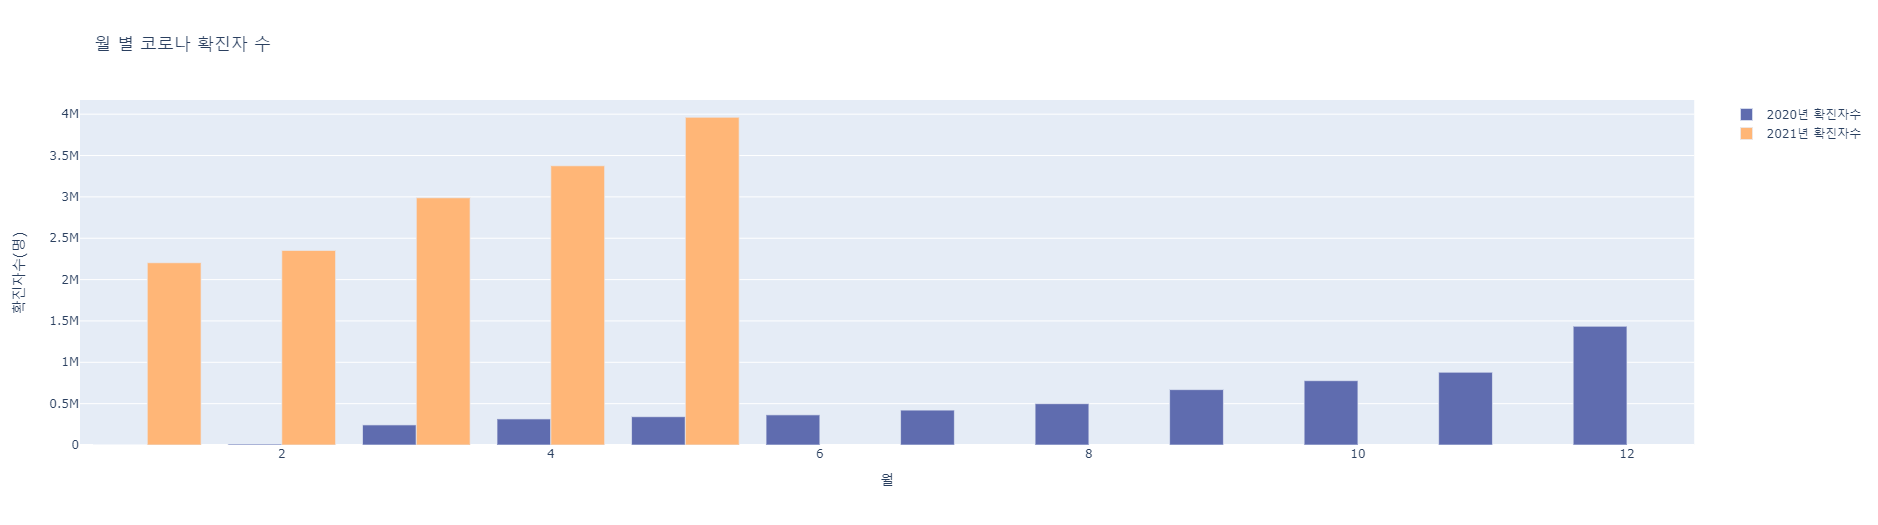